In [4]:
import os
import numpy as np
import imageio
import math as m
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib import colors as mcolors
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import cv2
# %matplotlib inline
%matplotlib notebook

import scipy.io as sio

In [120]:
limb_parents = [0, 0, 1, 2, 3, 1, 5, 6, 1, 0, 9, 10, 11, 0, 13, 14, 15] #17 joints
#limb_parents = [0, 0, 1, 2, 3, 1, 5, 6, 1, 0, 9, 10, 0, 12, 13] #15 joints

# -1: Left, 0: Middle/Center 1: Right
lr_flags = [
    0, 0,
    1, 1, 1,
    -1, -1, -1,
    0,
    1, 1, 1, 1,
    -1, -1, -1, -1,
]


lcolor = 'red'
rcolor = 'blue'
mcolor = 'green'

color_array = [{-1: lcolor, 0: mcolor, 1: rcolor}[flag] for flag in lr_flags]

plt_angles = [
    [-45, 10],
    [-135, 10],
    [-90, 10],
]

black = (0, 0, 0)
white = (1, 1, 1)

def plot_skeleton(ax, ske, az, ground_size=0.5, grid=False):
        
        lcolor = 'red'
        rcolor = 'blue'
        mcolor = 'green'
        ax.elev = 10
        ax.azim = az     
        lim = np.max(np.abs(ske))
        ax.set_xlim(-5, 5)
        ax.set_ylim(-5, 5)
        ax.set_zlim(-6, 6)
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        ax.set_zticklabels([])
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.grid(True)
#         ax.axis('off')
        

        if grid == False:
            ax.axis('off')
            ax.grid(False)


        C = [{-1: lcolor, 0: mcolor, 1: rcolor}[flag] for flag in lr_flags]
        P = limb_parents

        # Make connection matrix
#         joint_lines = []

        ax.scatter(ske[:, 0], ske[:, 1], ske[:, 2], c='black', s=600) #Highlighting Joints
        for i in range(ske.shape[0]):
            x = [ske[i, 0], ske[P[i], 0]]
            y = [ske[i, 1], ske[P[i], 1]]
            z = [ske[i, 2], ske[P[i], 2]]
            
            # print x,y,z
            ax.plot(x, y, z, lw=12, c=C[i])
        

In [121]:
def get_all_plots(skeleton_strips, m, az, grid=False):
    #m = 10
    fig=plt.figure(figsize=(5  * m , 10))
    gs = gridspec.GridSpec(1, m, wspace=0)
    gs.update(wspace=0, hspace=0) 

    for j in range(m):
        idx = j
        ax = plt.subplot(gs[idx], projection='3d')
        #color_ours = ['blue',  'green']
        plot_skeleton(ax, skeleton_strips[j], az, grid=grid)
    plt.tight_layout()

    return fig

In [45]:
pose_path_3d = '/data/vcl/sid/pose_generation/imm/imm_exp236/human36_poses.mat'
# pose_path_3d = 'poses_3d/HipHop_HipHop1_C0.mat'
poses_3d = sio.loadmat(pose_path_3d)['poses_3d']
preds_3d = sio.loadmat(pose_path_3d)['rot_poses_3d']

<IPython.core.display.Javascript object>


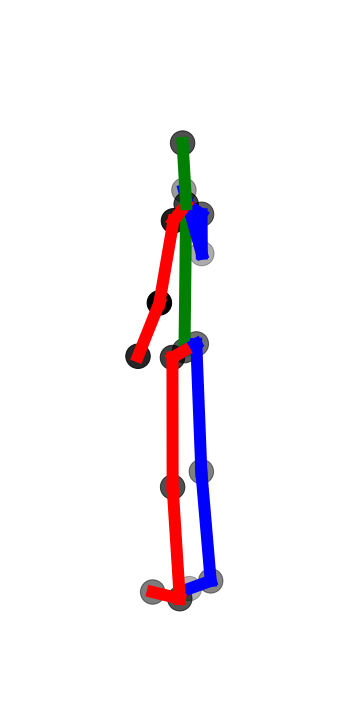

In [159]:
%matplotlib notebook
%matplotlib notebook
%matplotlib notebook
%matplotlib notebook
fig_grid = get_all_plots(poses_3d[1:2], 1, az = 45, grid=False)
fig_grid.savefig("./temp_fig.png",bbox_inches = 'tight', transparent=True)

<IPython.core.display.Javascript object>


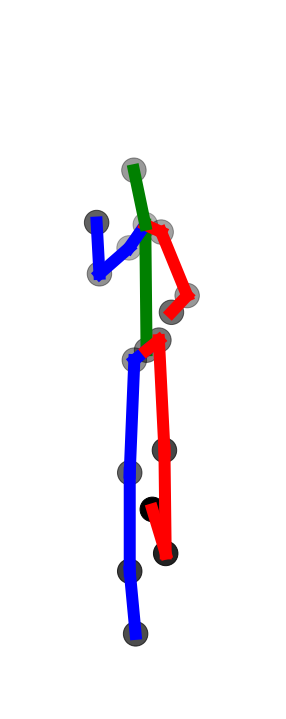

In [157]:
%matplotlib notebook
%matplotlib notebook
%matplotlib notebook
%matplotlib notebook
fig_grid = get_all_plots(preds_3d[1:2]-np.array([[0.,-20.,0.]]), 1, az = 45, grid=False)

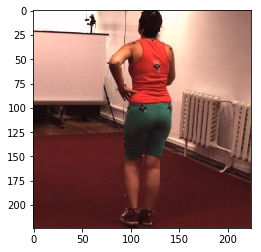

In [227]:
image = cv2.imread('/data/vcl/sid/pose_generation/imm/imm_exp236/000001_2.jpg')
%matplotlib inline
plt.imshow(image)

<IPython.core.display.Javascript object>


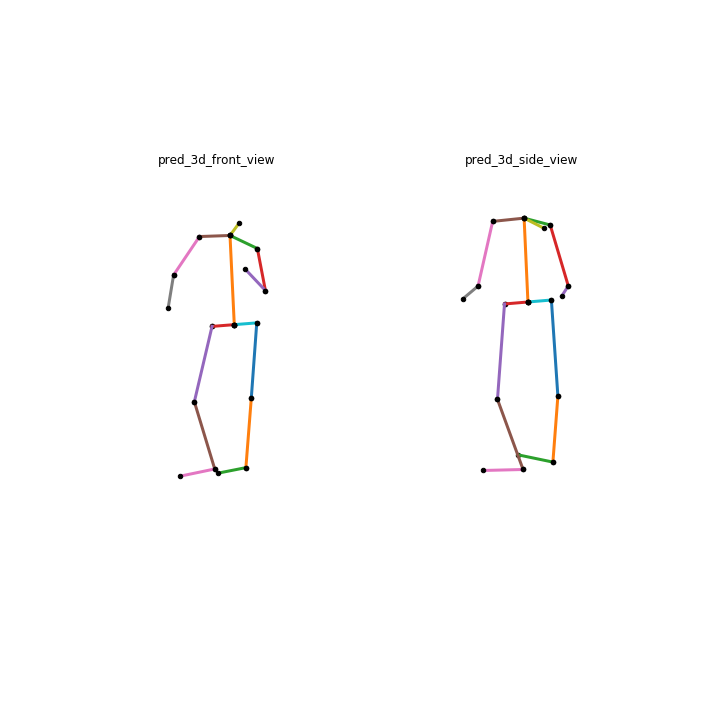

(2.7867887, -0.962584)
(2.7867887, -0.962584)


In [253]:
%matplotlib notebook
%matplotlib notebook
%matplotlib notebook
%matplotlib notebook
skeleton_images = skeleton_to_image(preds_3d[18:19])

<IPython.core.display.Javascript object>


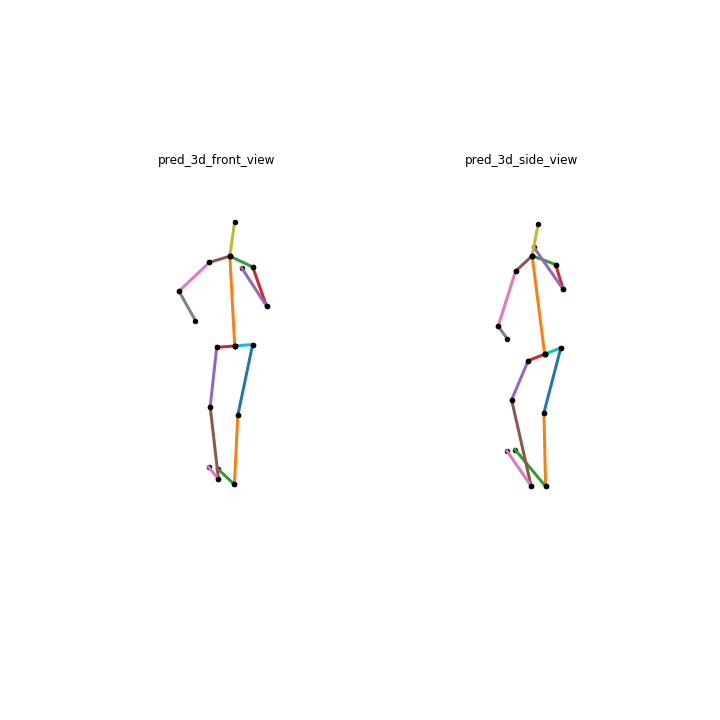

(3.4504235, -2.5400708)
(3.4504235, -2.5400708)


In [247]:
%matplotlib notebook
%matplotlib notebook
%matplotlib notebook
%matplotlib notebook
skeleton_images = skeleton_to_image(poses_3d[18:19])
# fig_grid.savefig("./temp_fig.png",bbox_inches = 'tight', transparent=True)

<IPython.core.display.Javascript object>


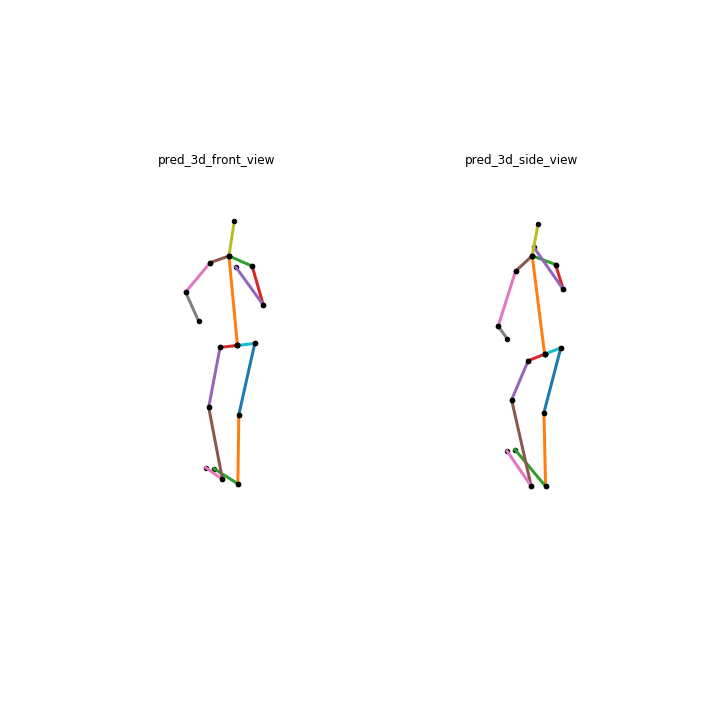

(3.4504235, -2.5400708)
(3.4504235, -2.5400708)


In [260]:
%matplotlib notebook
%matplotlib notebook
%matplotlib notebook
%matplotlib notebook
skeleton_images = skeleton_to_image(poses_3d[18:19])
# fig_grid.savefig("./temp_fig.png",bbox_inches = 'tight', transparent=True)

In [ ]:
%matplotlib notebook
%matplotlib notebook
%matplotlib notebook
%matplotlib notebook
skeleton_images = skeleton_to_image(poses_3d[4:5])
# fig_grid.savefig("./temp_fig.png",bbox_inches = 'tight', transparent=True)

In [259]:
limb_parents = [0, 0, 1, 2, 3, 1, 5, 6, 1, 0, 9, 10, 11, 0, 13, 14, 15]

def draw_limbs_3d_plt(joints_3d, ax, limb_parents=limb_parents, z_flip = True):
    for i in range(joints_3d.shape[0]):
#         plt.text(i, (joints_3d[i, 0], joints_3d[i, 0]), str(i))
#         ax.text(joints_3d[i, 0], joints_3d[i, 1], joints_3d[i, 2], s=str(i))
        x_pair = [joints_3d[i, 0], joints_3d[limb_parents[i], 0]]
        y_pair = [joints_3d[i, 1], joints_3d[limb_parents[i], 1]]
        z_pair = [joints_3d[i, 2], joints_3d[limb_parents[i], 2]]
        ax.scatter(x_pair[0], y_pair[0], z_pair[0], c='black', s=20)
        ax.scatter(x_pair[1], y_pair[1], z_pair[1], c='black', s=20)
        if z_flip:
            ax.plot(z_pair, x_pair, y_pair, linewidth=3, antialiased=True)
        else:
            ax.plot(x_pair, y_pair,z_pair, linewidth=3, antialiased=True)
            
        dist = np.sqrt(np.square(x_pair[0]-x_pair[1]) + np.square(y_pair[0]-y_pair[1]) + np.square(z_pair[0]-z_pair[1]))
#         print ("distance ", i, "<->", limb_parents[i], " = ", dist)
    # ax.view_init(10, 210)   

def get_skeleton_plot(joints_3d, ax, limb_parents=limb_parents, title="", z_flip=True):
#     fig = plt.figure(frameon=False, figsize=(7, 7))
    draw_limbs_3d_plt(joints_3d, ax, limb_parents, z_flip=False)
    plt.title(title)


def plot_skeleton(joints_3d, ax, limb_parents=limb_parents, title="", z_flip=True):
    get_skeleton_plot(joints_3d, ax, limb_parents, title, z_flip=z_flip)

# def get_ax(joints_3d, fig, az=0, ele=10, subplot='111'):
#     ax = fig.add_subplot(subplot, projection='3d')

#     lim = np.max(np.abs(joints_3d))
# #     print("lim", lim)
#     ax.view_init(azim=az, elev=ele)
    
#     ax.set_xlim(-lim, lim)
#     ax.set_ylim(-lim, lim)
#     ax.set_zlim(-lim, lim)
#     ax.set_xlabel('x')
#     ax.set_ylabel('y')
#     ax.set_zlabel('z')
    
#     return ax

# def get_ax(joints_3d, fig, az=0, ele=10, subplot='111'):
#     ax = fig.add_subplot(subplot, projection='3d')

#     lim_max = np.max(joints_3d)
#     lim_min = np.min(joints_3d)
# #     print("lim", lim)
#     ax.view_init(azim=az, elev=ele)
    
#     ax.set_xlim(lim_min, lim_max)
#     ax.set_ylim(lim_min, lim_max)
#     ax.set_zlim(lim_min, lim_max)
#     ax.set_xlabel('x')
#     ax.set_ylabel('y')
#     ax.set_zlabel('z')
    
#     return ax

def get_ax(joints_3d, fig, az=0, ele=10, subplot='111'):
    ax = fig.add_subplot(subplot, projection='3d')

    lim_max_x = np.amax(joints_3d[:, 0])
    lim_min_x = np.amin(joints_3d[:, 0])
    lim_max_y = np.amax(joints_3d[:, 1])
    lim_min_y = np.amin(joints_3d[:, 1])
    lim_max_z = np.amax(joints_3d[:, 2])
    lim_min_z = np.amin(joints_3d[:, 2])
    print (lim_max_x, lim_min_x)
#     print("lim", lim)
    ax.view_init(azim=az, elev=ele)
    
    ax.set_xlim(lim_min_x-1.0, lim_max_x+1.0)
    ax.set_ylim(lim_min_y-1.0, lim_max_y+1.0)
    ax.set_zlim(lim_min_z-1.0, lim_max_z+1.0)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    
    grid = False
    if grid == False:
        ax.axis('off')
        ax.grid(False)
    
    return ax

def vis_3d(skeleton_3d):
    fig = plt.figure(frameon=False, figsize=(10, 10))
    # az = 90
    ax = get_ax(skeleton_3d, fig, az=68, ele=7, subplot='121')
    plot_skeleton(skeleton_3d, ax, z_flip=False)
    ax.set_title("pred_3d_front_view")

    ax = get_ax(skeleton_3d, fig, az=60, ele=20, subplot='122')
    plot_skeleton(skeleton_3d, ax, z_flip=False)
    ax.set_title("pred_3d_side_view")

    return fig

def skeleton_to_image(skltn):
    '''
    skltn: batch of 3d skeletons
    '''
    fig = vis_3d(skltn[0])
    fig.savefig("skeleton_3d.png", transparent=True)
#     plt.close(fig)
#     fig_img = cv2.imread("skeleton_3d.png")[:, :, ::-1]

<IPython.core.display.Javascript object>


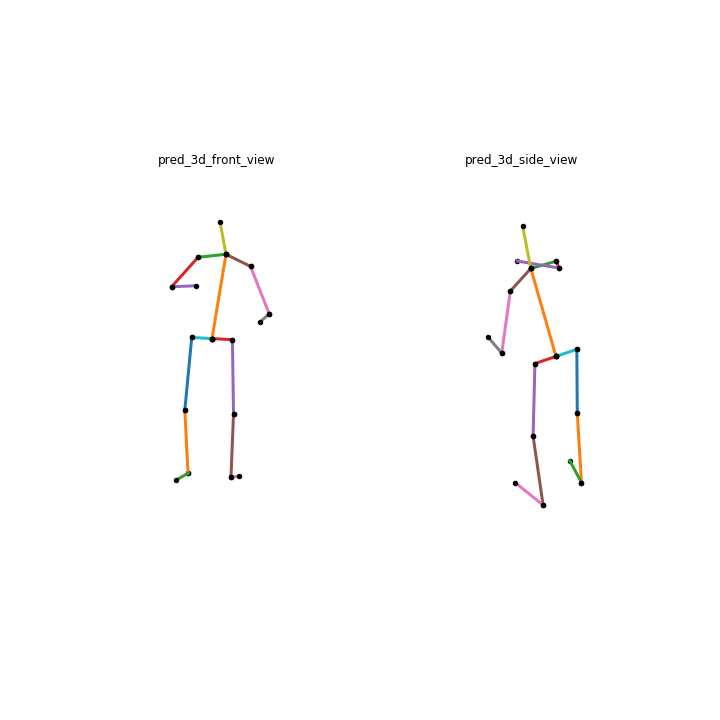

(2.823601187222712, -1.7301931246286886)
(2.823601187222712, -1.7301931246286886)


In [39]:
pose_path_3d = '/data/vcl/sid/human36_parsed/parsed_data/poses_3d/S11_Directions_55011271.mat'
# pose_path_3d = 'poses_3d/HipHop_HipHop1_C0.mat'
poses_3d = sio.loadmat(pose_path_3d)['pose_3d']
skeleton_images = skeleton_to_image(poses_3d[150:151])

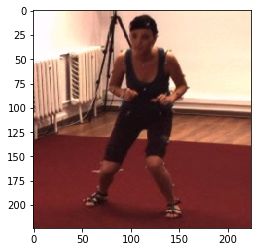

In [38]:
import cv2
%matplotlib inline
image_path = '/data/vcl/sid/pose_generation/imm/imm_exp236/000000_2.jpg'
image = cv2.imread(image_path)
plt.imshow(image)

<IPython.core.display.Javascript object>


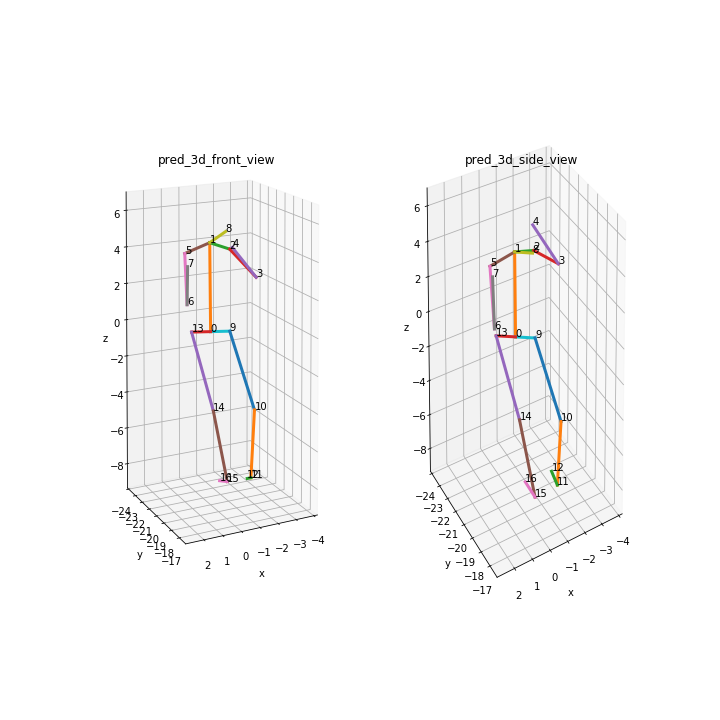

(1.8111511, -3.0620446)
(1.8111511, -3.0620446)


In [117]:

skeleton_images = skeleton_to_image(preds_3d[23:24])

<IPython.core.display.Javascript object>


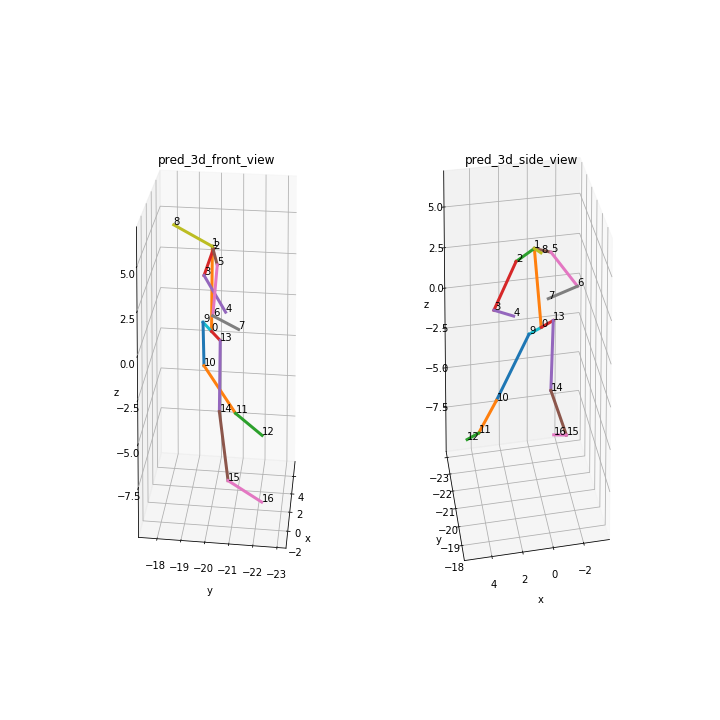

(4.583567, -2.518769)
(4.583567, -2.518769)


In [61]:
pose_path_3d = '/data/vcl/sid/pose_generation/imm/imm_exp236/human36_poses.mat'
# pose_path_3d = 'poses_3d/HipHop_HipHop1_C0.mat'
poses_3d = sio.loadmat(pose_path_3d)['rot_poses_3d']
skeleton_images = skeleton_to_image(poses_3d[2:3])

<IPython.core.display.Javascript object>


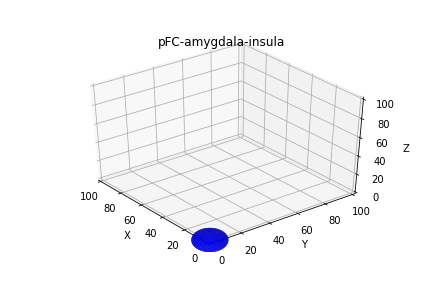

Duration: 193.129971


In [166]:
from __future__ import print_function
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
import time , random
%matplotlib notebook
%matplotlib notebook
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim3d([100.0, 0.0])
ax.set_xlabel('X')
ax.set_ylim3d([0.0, 100.0])
ax.set_ylabel('Y')
ax.set_zlim3d([0.0, 100.0])
ax.set_zlabel('Z')
ax.set_title('pFC-amygdala-insula')

wframe = None
tstart = time.time()
center_x = 0.
center_y = 0.
center_z = 0.
for num in range(1):
    oldcol = wframe
    r = random.randint(1, 20)
    alpha = 1.0 / random.randint(25, 100)
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x = r * np.outer(np.cos(u), np.sin(v)) + center_x
    y = r * np.outer(np.sin(u), np.sin(v)) + center_y
    z = r * np.outer(np.ones(np.size(u)), np.cos(v)) + center_z
    sphere = ax.plot_surface(x, y, z, color='b', alpha=alpha)
    if oldcol is not None: ax.collections.remove(oldcol)
#     plt.pause(.001)

print('Duration: %f' % (100 / (time.time() - tstart)))